In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# load the dataset 
url = 'ML-Python-Lab-Data.csv'
df = pd.read_csv(url)
df.head()

,0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,2.0
0,1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
1,2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
2,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0
3,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0
4,5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0


In [8]:
# load the dataset with names 
url = 'ML-Python-Lab-Data.csv'
df = pd.read_csv(url, names = [
'Index',
'Sex',
'Length',
'Diameter',
'Height',
'Whole weight',
'Shucked weight',
'Viscera weight',
'Shell weight',
'Rings'
])
df.head()

,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.514,0.2245,0.1010,0.150,2.0
1,1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
2,2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
3,3,M,0.440,0.365,0.125,0.516,0.2155,0.1140,0.155,1.0
4,4,I,0.330,0.255,0.080,0.205,0.0895,0.0395,0.055,0.0


In [9]:
# drop null rows 
df = df.dropna(axis = 0)

# drop useless columns
df = df.drop(columns = ['Index'])

In [15]:
# target column
target = 'Rings'

# alphebetical to numerical for target column,
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# from Sex column makes three different boolean columns (one for each possible Sex value: male, female, indefinite)
encoder = make_column_transformer((OneHotEncoder(), ['Sex']), # encode per columns 
                                  remainder='passthrough') # rewrite other columns 
transformed = encoder.fit_transform(df)

#Since `fit_transform` returns an `ndarray`, but a dataframe is needed
encdf = pd.DataFrame(transformed, columns = encoder.get_feature_names_out())
encdf.rename(columns = {'onehotencoder__Sex_F':'Female', 'onehotencoder__Sex_I':'Indefinite', 'onehotencoder__Sex_M':'Male',
                        'remainder__Length':'Length', 
                        'remainder__Diameter':'Diameter',
                        'remainder__Height':'Heigth',
                        'remainder__Whole weight':'Whole weight',
                        'remainder__Shucked weight':'Shucked weight',
                        'remainder__Viscera weight':'Viscera weight', 
                        'remainder__Shell weight':'Shell weight', 
                        'remainder__Rings':'Rings'}, inplace = True)  # renaming of the freshly added columns
encdf

,Female,Indefinite,Male,Length,Diameter,Heigth,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2.0
1,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1.0
2,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0
3,0.0,1.0,0.0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0.0
4,1.0,0.0,0.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,3.0
...,...,...,...,...,...,...,...,...,...,...,...
3047,0.0,0.0,1.0,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,1.0
3048,0.0,0.0,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1.0
3049,0.0,0.0,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1.0
3050,1.0,0.0,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0


In [16]:
encdf.describe()

,Female,Indefinite,Male,Length,Diameter,Heigth,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000,3052.000000
mean,0.314220,0.307995,0.377785,0.528711,0.412182,0.141348,0.848453,0.365107,0.184521,0.245766,0.937418
std,0.464281,0.461740,0.484913,0.118448,0.098055,0.042892,0.491105,0.220724,0.109367,0.140534,0.785197
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.000000,0.000000,0.460000,0.355000,0.115000,0.466750,0.195500,0.099000,0.137875,0.000000
50%,0.000000,0.000000,0.000000,0.550000,0.425000,0.145000,0.817250,0.342000,0.174000,0.240000,1.000000
75%,1.000000,1.000000,1.000000,0.620000,0.485000,0.170000,1.176125,0.506625,0.257000,0.335000,1.000000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.641500,0.897000,3.000000


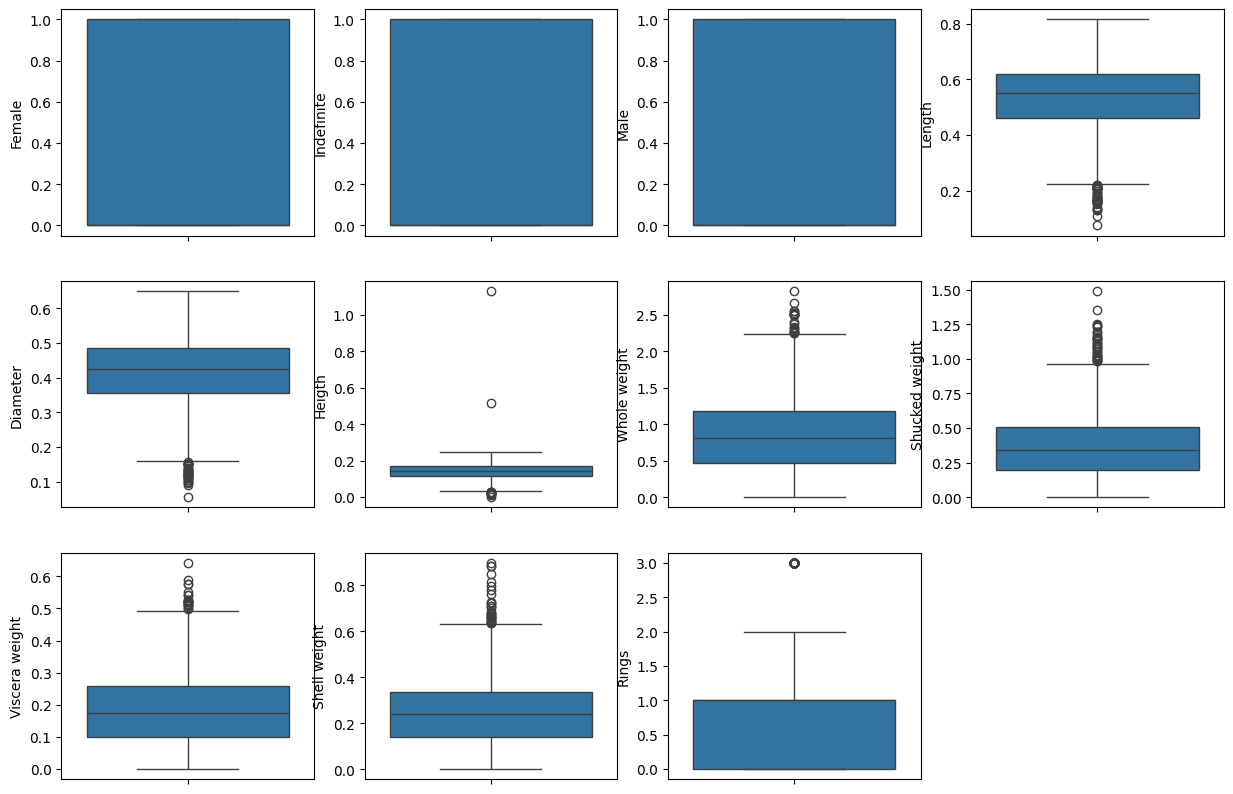

In [17]:
cols = encdf.columns
pos = 1 
plt.figure(figsize=(15, 10))
for col in cols:
    plt.subplot(3, 4, pos)
    sns.boxplot(encdf[col])
    
    pos += 1
    
plt.show() 

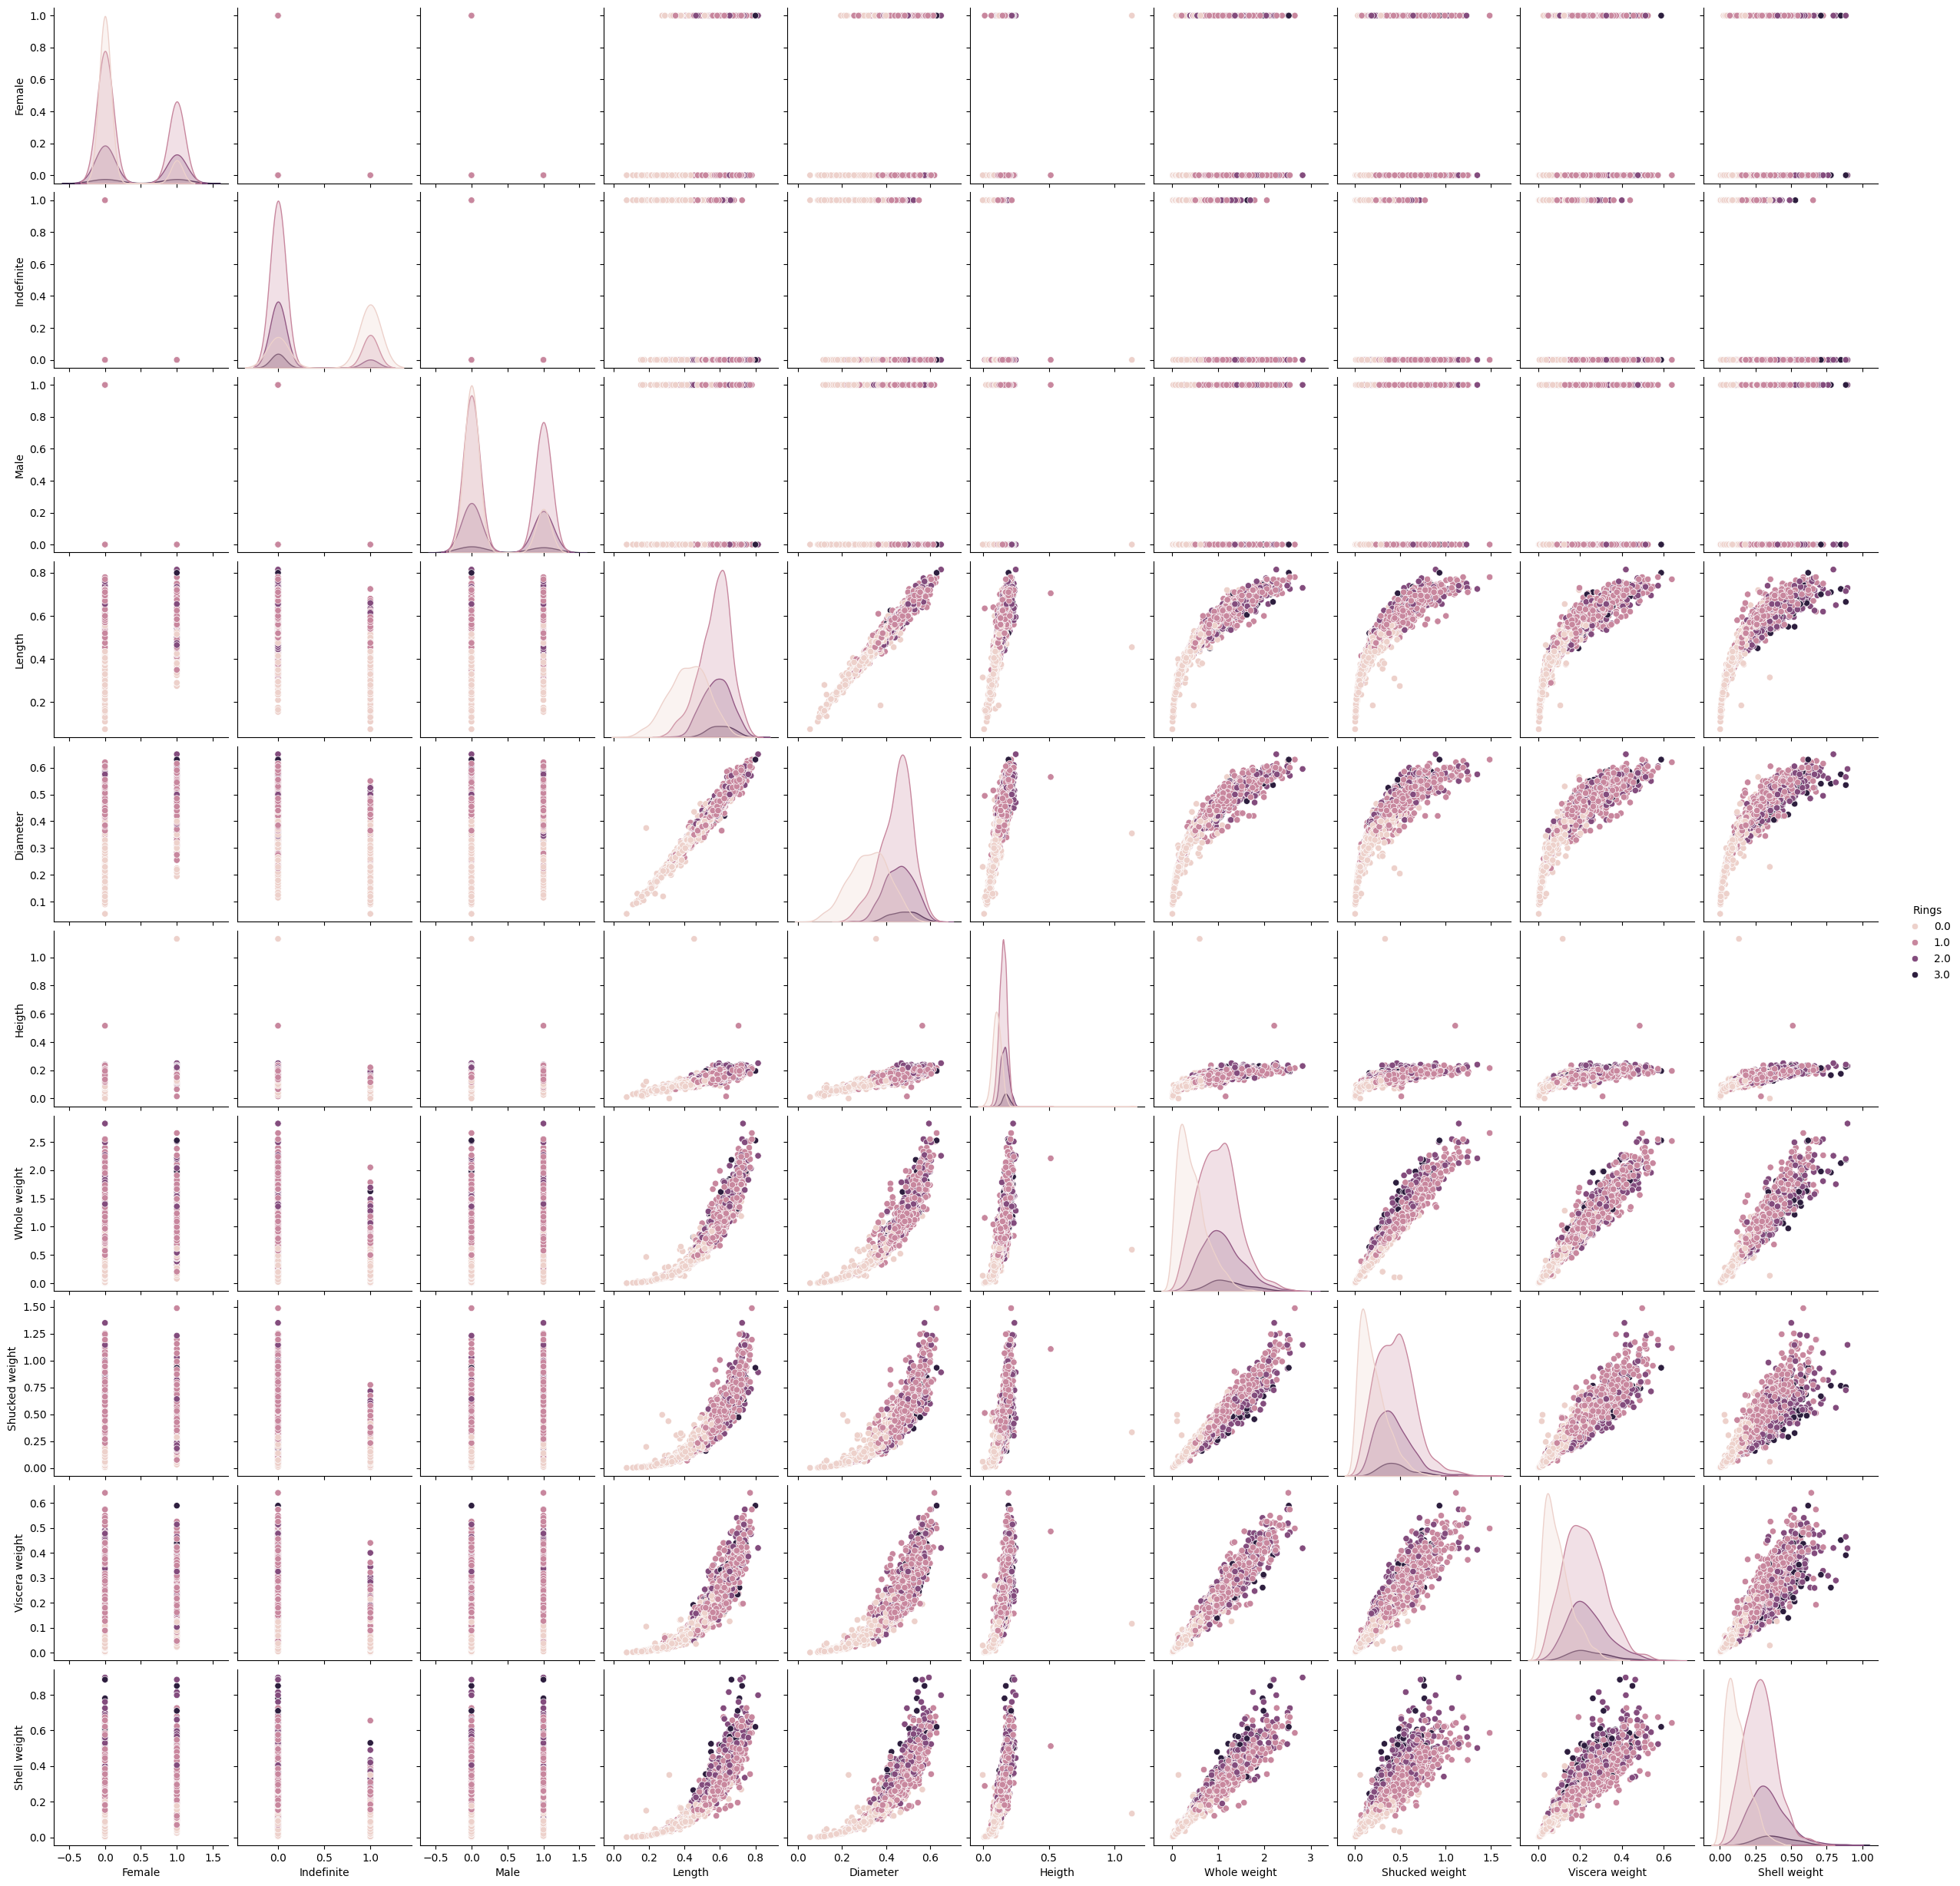

In [18]:
sns.pairplot(encdf, hue = target)

<Axes: >

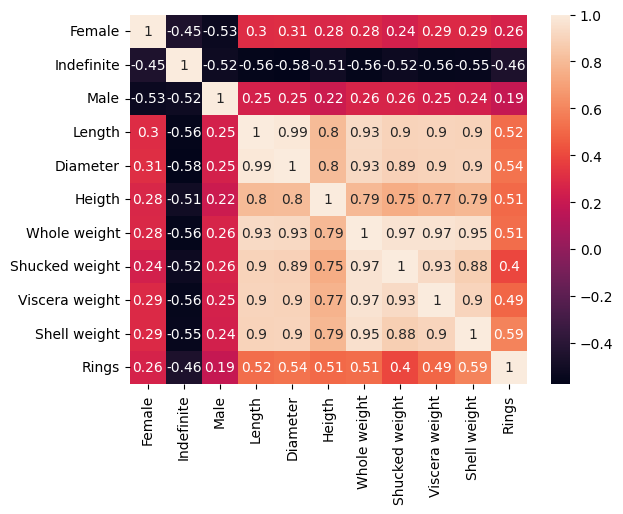

In [19]:
corr = encdf.corr()
sns.heatmap(corr, annot = True)

In [ ]:
# male and female columns are useless for the classification operation becouse , 
# all the other attribute are usefull because show us a certain 
# correlation with the target